In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd

In [3]:
bdd = pd.read_csv("/neurospin/dico/jchavas/Runs/61_classifier_regresser/Output/flanker/summary/bdd_2023-09-26_inferior_temporal.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [33]:
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
9,/home_local/jc225751/Runs/61_classifier_regres...,0.464740,0.473650,0.501443,0.557953,0.621440,0.532468,0.139103,0.992356,0.006592,138.673721,0.820607,1.061610,1.052700
4,/home_local/jc225751/Runs/61_classifier_regres...,0.626189,0.677905,0.532179,0.621787,0.676923,0.531025,0.286876,0.850695,0.000102,138.452469,0.701290,0.695906,0.644190
5,/home_local/jc225751/Runs/61_classifier_regres...,0.611398,0.524714,0.517172,0.565051,0.630769,0.527850,0.071892,0.736797,0.000510,138.398804,0.804180,1.037257,1.037257
30,/home_local/jc225751/Runs/61_classifier_regres...,0.823671,0.589853,0.534199,0.603511,0.665794,0.524531,0.075156,0.838581,0.000351,131.535904,0.730695,1.054113,1.054113
3,/home_local/jc225751/Runs/61_classifier_regres...,0.688971,0.526678,0.485137,0.621937,0.668412,0.522367,0.163359,0.708882,0.000166,137.460846,0.709650,1.108939,1.108939


AUC = 0.5034632034632034 +/- 0.014712247158412475
AUC-1 = 0.4979797979797979 +/- 0.019979708560614897
AUC-2 = 0.5034632034632034 +/- 0.014712247158412475
AUC (best model) = 0.4868398268398268 +/- 0.011782528717717053


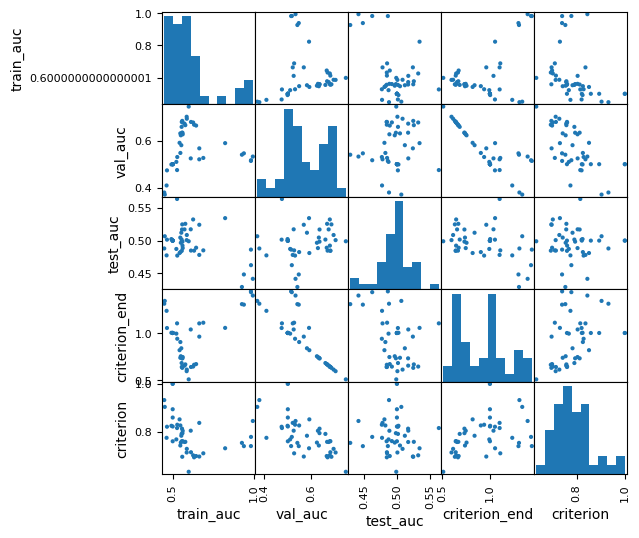

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end_old"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["criterion_end"] = bdd.apply(lambda x: 2*(1-x["val_auc"]) + max(-x["val_auc"] + x["train_auc"], 0), axis=1)
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'criterion_end', 'criterion']],
                                 figsize=(6,6),
                                 alpha=1.0)

In [34]:
bdd = bdd.sort_values(by=['criterion_end'], ascending=True)
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
36,/home_local/jc225751/Runs/61_classifier_regres...,0.598809,0.745827,0.498990,0.606531,0.760884,0.491631,0.124402,0.894893,0.000229,138.630814,0.632586,0.655365,0.508347
41,/home_local/jc225751/Runs/61_classifier_regres...,0.586309,0.702455,0.500722,0.585460,0.701473,0.496392,0.254461,0.794546,0.000321,138.583435,0.713067,0.711236,0.595090
32,/home_local/jc225751/Runs/61_classifier_regres...,0.587068,0.693944,0.508514,0.586287,0.685434,0.513997,0.217545,0.875238,0.000247,138.776733,0.728280,0.718988,0.612111
18,/home_local/jc225751/Runs/61_classifier_regres...,0.558944,0.684779,0.524675,0.604262,0.700491,0.466955,0.239622,0.898063,0.000417,138.457809,0.695247,0.756277,0.630442
17,/home_local/jc225751/Runs/61_classifier_regres...,0.556052,0.680360,0.484416,0.557547,0.682488,0.481097,0.239798,0.867935,0.000988,138.769058,0.759965,0.763588,0.639280


Text(0, 0.5, 'best_test_auc')

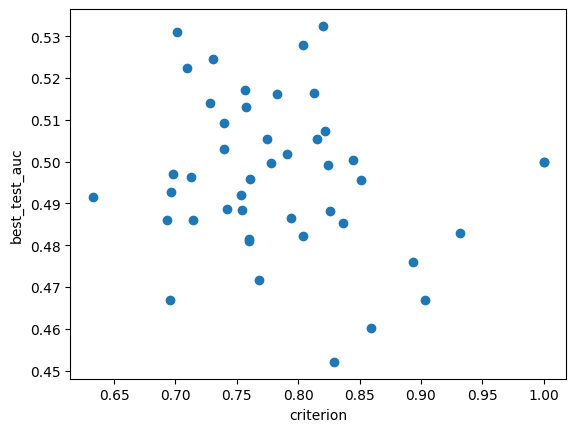

In [7]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

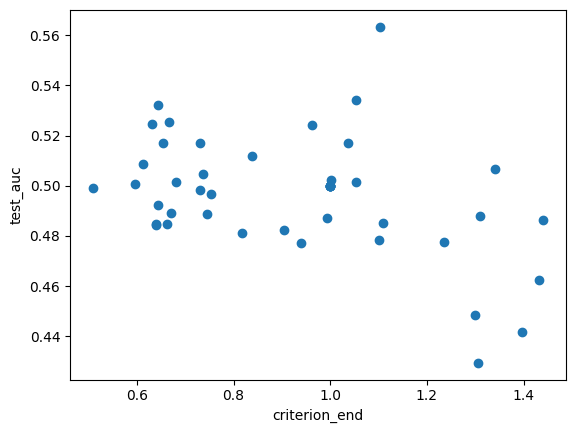

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'val_auc')

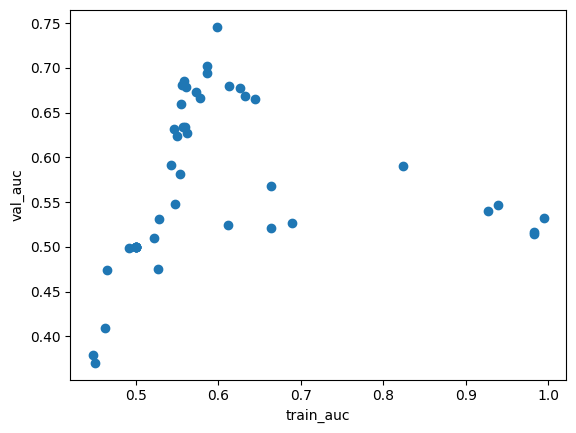

In [9]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'criterion')

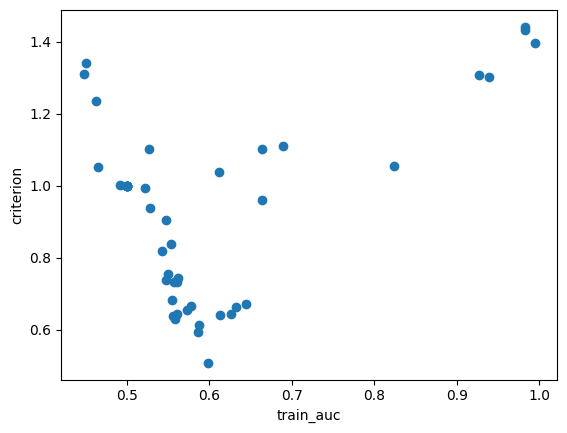

In [10]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion")

Text(0, 0.5, 'test_auc')

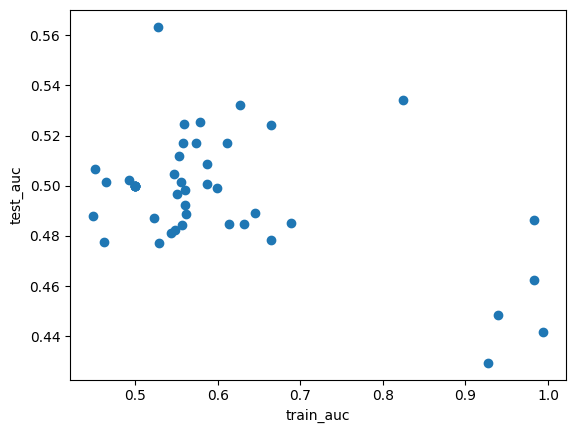

In [11]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

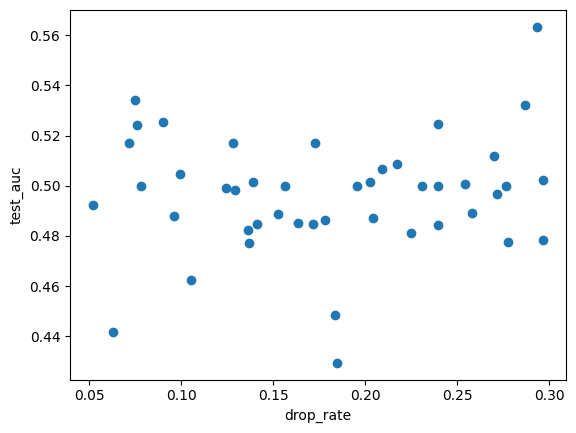

In [12]:
plt.scatter(bdd.drop_rate, bdd.test_auc)
plt.xlabel("drop_rate")
# plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

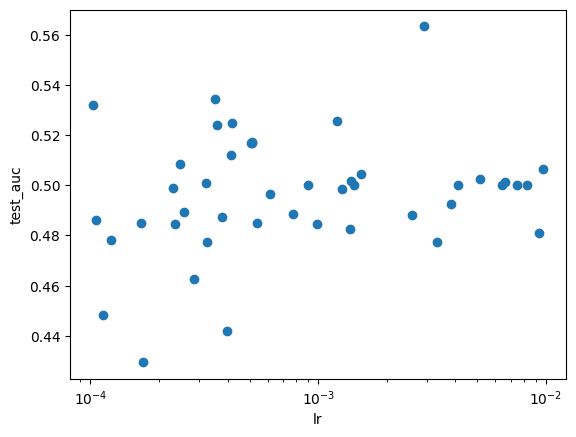

In [13]:
plt.scatter(bdd.lr, bdd.test_auc)
plt.xlabel("lr")
plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

(0.7, 0.85)

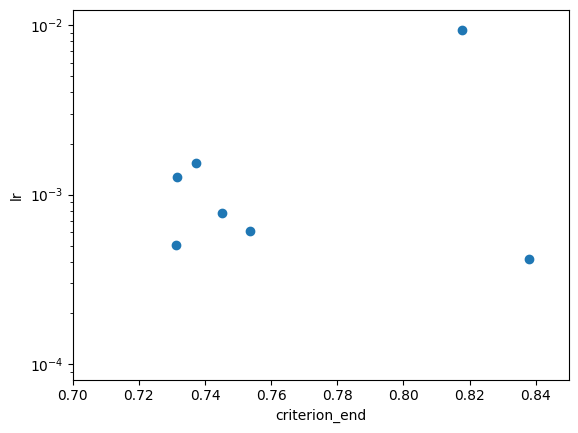

In [14]:
plt.scatter(bdd["criterion_end"], bdd.lr)
plt.xlabel("criterion_end")
plt.ylabel("lr")
plt.yscale("log")
plt.xlim((0.7,0.85))

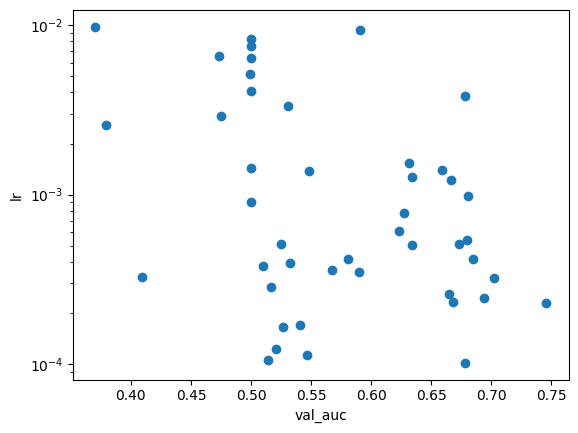

In [15]:
plt.scatter(bdd["val_auc"], bdd.lr)
plt.xlabel("val_auc")
plt.ylabel("lr")
plt.yscale("log")

(0.7, 0.85)

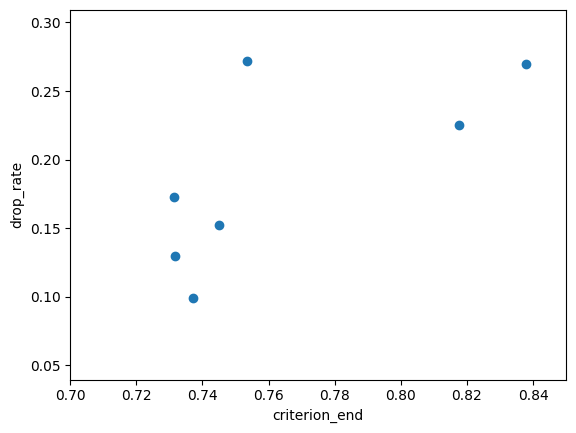

In [16]:
plt.scatter(bdd["criterion_end"], bdd.drop_rate)
plt.xlabel("criterion_end")
plt.ylabel("drop_rate")
# plt.yscale("log")
plt.xlim((0.7,0.85))

In [17]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [18]:
test_auc

[0.5034632034632034,
 0.5066017316017315,
 0.5035786435786436,
 0.4970779220779221,
 0.48820346320346314,
 0.5056998556998558,
 0.5003298289012574,
 0.5188744588744589,
 0.46013708513708507,
 0.47478354978354975]

In [19]:
error

[0.006579516949597682,
 0.01095119502236398,
 0.007832507621055347,
 0.0032996992342703545,
 0.008004296399939393,
 0.01839826839826844,
 0.00032982890125746574,
 0.014444754376494246,
 0.012923979224640376,
 0.014208542731427331]

Text(0, 0.5, 'test_auc')

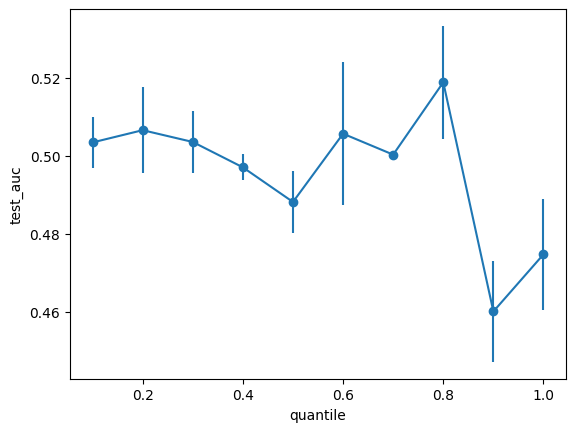

In [20]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
# plt.ylim((0.45,0.6))

(0.45, 0.6)

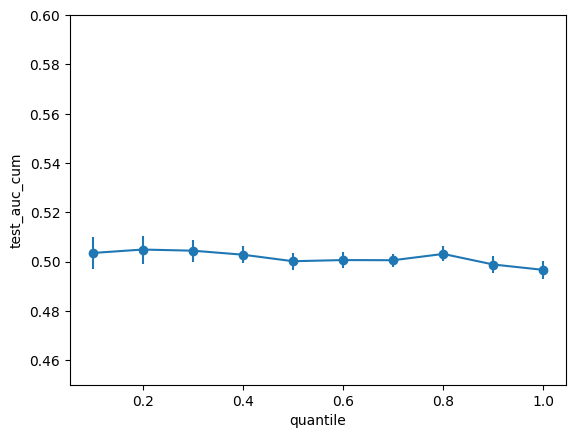

In [21]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

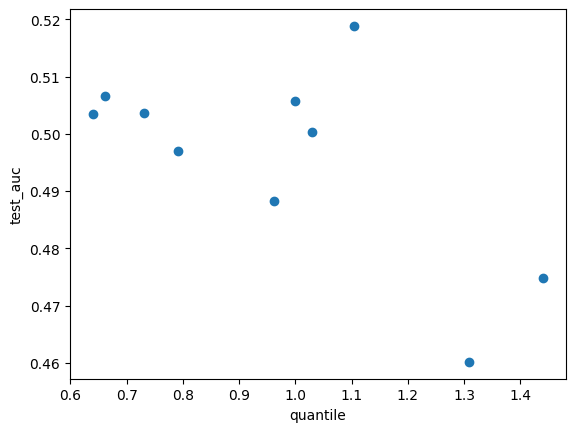

In [22]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [23]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

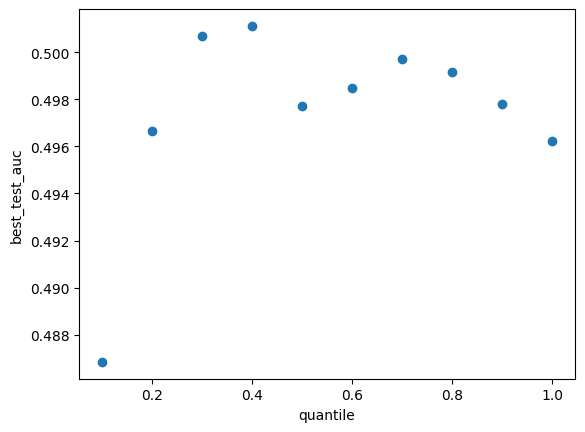

In [24]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

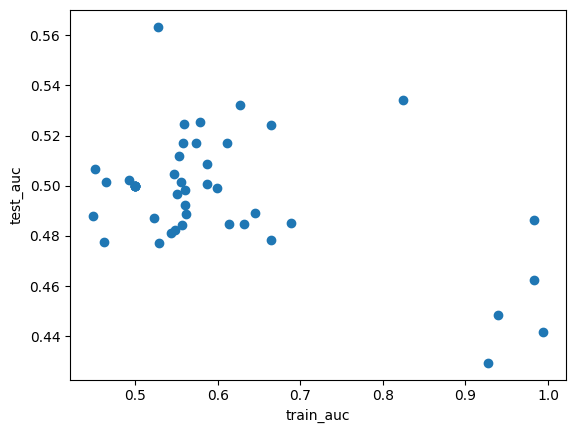

In [25]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

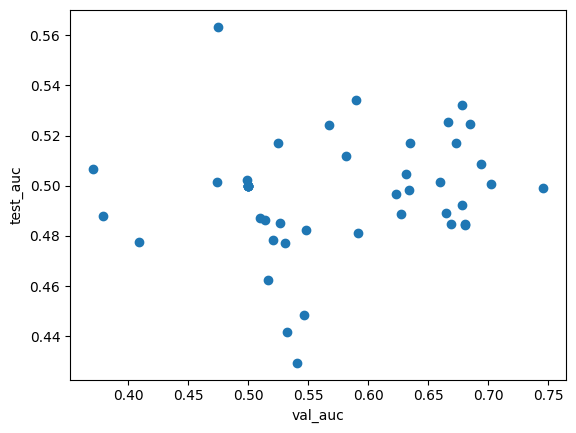

In [26]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'criterion')

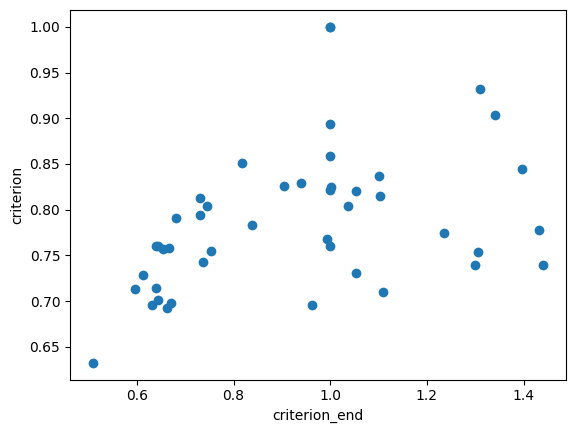

In [27]:
plt.scatter(bdd.criterion_end, bdd.criterion)
plt.xlabel("criterion_end")
plt.ylabel("criterion")

/tmp/ipykernel_4112012/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


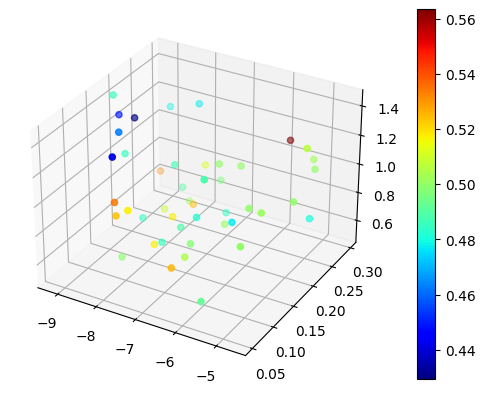

In [28]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_4112012/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


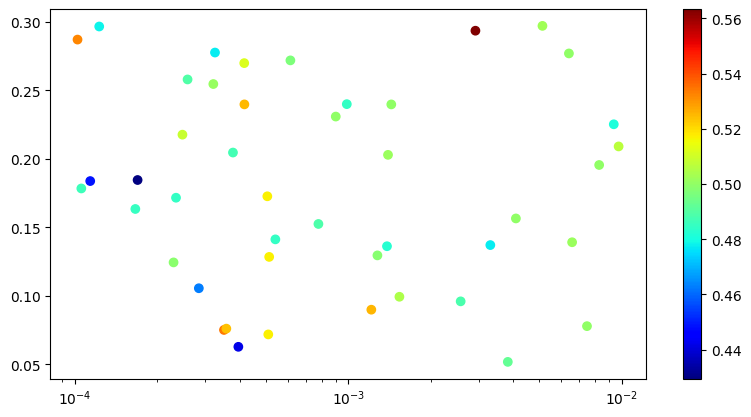

In [29]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_4112012/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


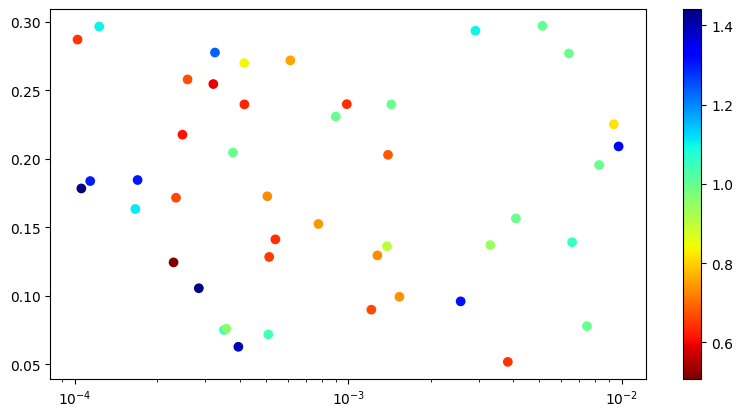

In [30]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'val_auc')

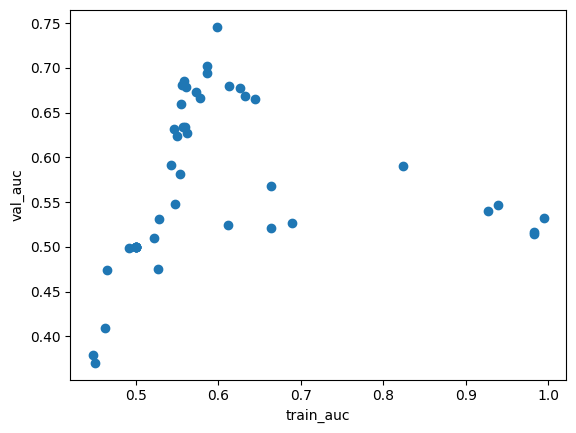

In [31]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

In [32]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
36,/home_local/jc225751/Runs/61_classifier_regres...,0.598809,0.745827,0.498990,0.606531,0.760884,0.491631,0.124402,0.894893,0.000229,138.630814,0.632586,0.655365,0.508347
41,/home_local/jc225751/Runs/61_classifier_regres...,0.586309,0.702455,0.500722,0.585460,0.701473,0.496392,0.254461,0.794546,0.000321,138.583435,0.713067,0.711236,0.595090
32,/home_local/jc225751/Runs/61_classifier_regres...,0.587068,0.693944,0.508514,0.586287,0.685434,0.513997,0.217545,0.875238,0.000247,138.776733,0.728280,0.718988,0.612111
18,/home_local/jc225751/Runs/61_classifier_regres...,0.558944,0.684779,0.524675,0.604262,0.700491,0.466955,0.239622,0.898063,0.000417,138.457809,0.695247,0.756277,0.630442
17,/home_local/jc225751/Runs/61_classifier_regres...,0.556052,0.680360,0.484416,0.557547,0.682488,0.481097,0.239798,0.867935,0.000988,138.769058,0.759965,0.763588,0.639280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,/home_local/jc225751/Runs/61_classifier_regres...,0.447967,0.379214,0.488023,0.524991,0.543044,0.482973,0.095999,0.900809,0.002577,138.596725,0.931964,1.310323,1.310323
27,/home_local/jc225751/Runs/61_classifier_regres...,0.451152,0.370376,0.506638,0.523887,0.572668,0.466955,0.208968,0.726272,0.009754,138.642563,0.903445,1.340022,1.340022
25,/home_local/jc225751/Runs/61_classifier_regres...,0.994547,0.532570,0.441847,0.705512,0.620295,0.500433,0.062854,0.769009,0.000396,134.093658,0.844628,1.396838,1.396838
21,/home_local/jc225751/Runs/61_classifier_regres...,0.983249,0.516858,0.462626,0.675390,0.632406,0.499567,0.105564,0.762316,0.000284,120.333130,0.778173,1.432676,1.432676
